$\newcommand{mb}[1]{\mathbf{#1}}$

<!-- dom:TITLE: Numerical differentiation and numerical solution of boundary value problems -->
# Numerical differentiation and numerical solution of boundary value problems
<!-- dom:AUTHOR: Anne Kværnø -->
<!-- Author: -->  
**Anne Kværnø**

Date: **Aug 18, 2022**

# Introduction
In this note the finite difference method for solving boundary problems
(BVPs) will be presented. 

Before presenting the ideas, let us start with an example. 

**A chemical reactor example.**

Consider a chemical reactor, formed as a tube of length $L$. A chemical compound $A$ is injected
into the reactor at a given concentration $u_0$ and flows with horizontal speed $v(x)>0$ along the reactor. We
will also assume to know the efficiency factor $\epsilon\in [0,1]$ of the reaction, so that the concentration of $A$ at the outlet is known: $u_L = (1-\epsilon)u_0$. How can we determine the concentration of
$A$ at some point $x$ *inside* the reactor? 

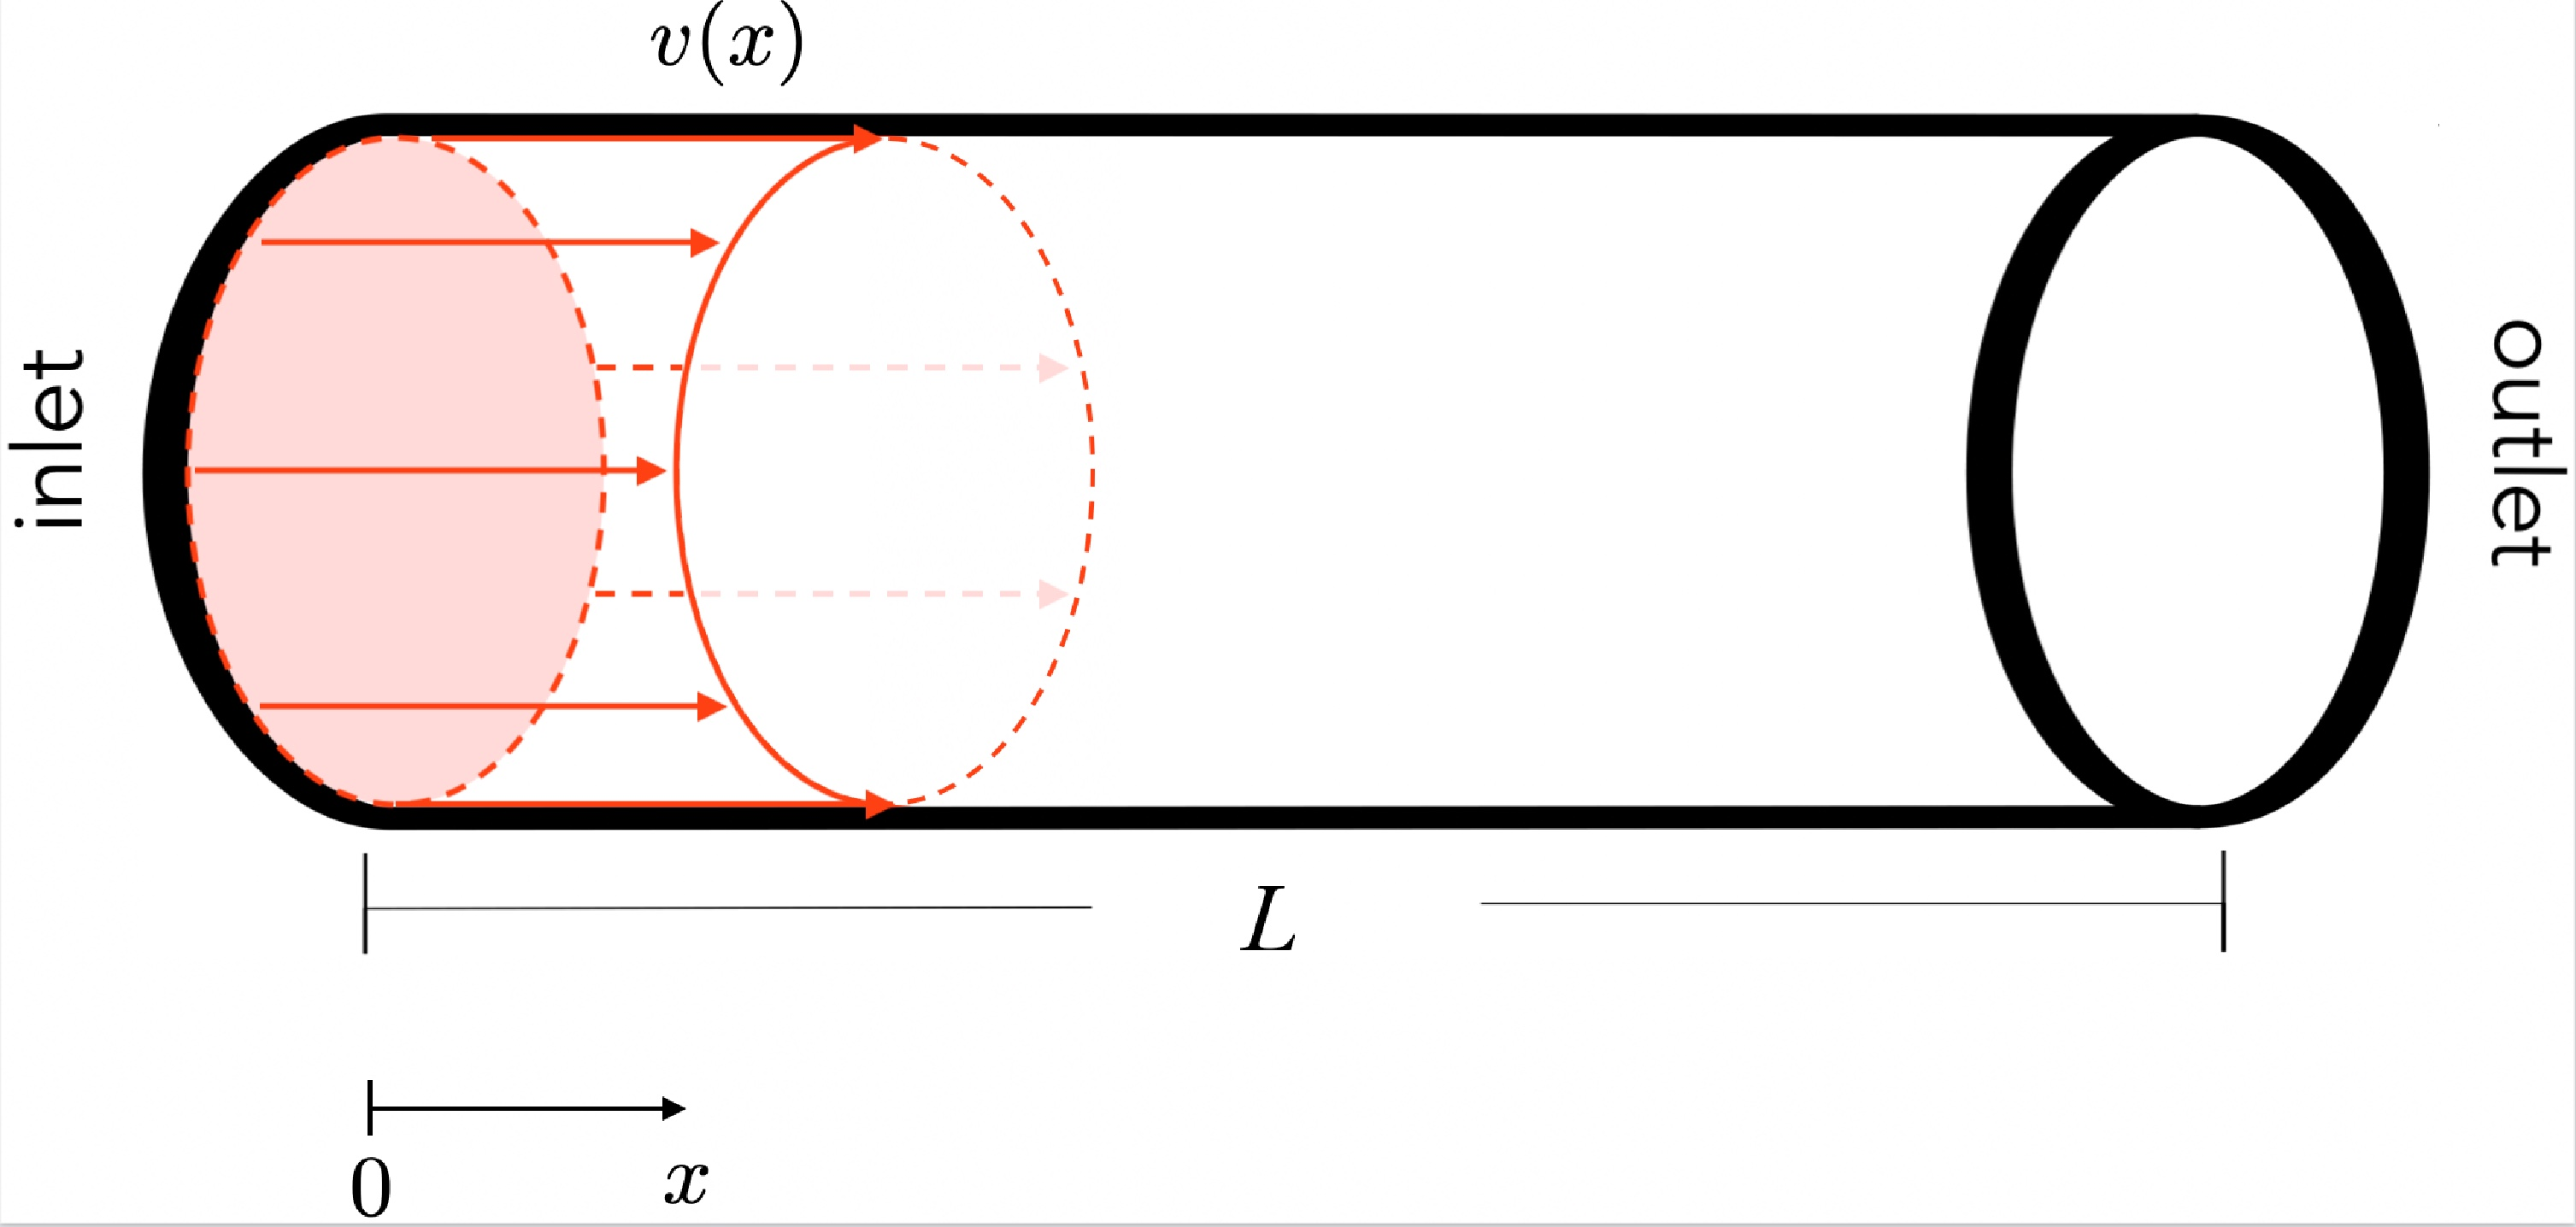


If the reaction is a decomposition of $A$ into other species, we can for example have
uni- or bimolecular reactions:
1. First-order reaction: $A\rightarrow B+C$, for example $\mathrm{CH}_4 \rightarrow \mathrm{C}+2\mathrm{H}_2$ (methane cracking).

2. Second-order reaction: $2A\rightarrow B+C$, for example $2\mathrm{NO}_2 \rightarrow 2\mathrm{NO}+\mathrm{O}_2$.

Let us denote the concentration of compound $A$ along the reactor as $u(x)$, and assuming a
steady state problem, that is, nothing changes in time, these reactions can be modelled by the
following BVP:

$$
\begin{align*}
  \alpha u'' - v u' - \kappa u^n &= 0, \\ 
  u(0) &= u_0, \qquad \text{(known concentration at the inlet)} \\ 
  u(L) &= u_L, \qquad \text{(known concentration at the outlet)}
\end{align*}
$$

where the coefficients $\alpha$, $v$ and $\kappa$ are known, and $n$ is the stoichiometric
coefficient of $A$, we have $n=1$ for reactions $A\rightarrow B+C$ and $n=2$ when $2A\rightarrow
B+C$.

When $n=1$, the BVP is linear, and if further all the coefficients constants, this problem can be
solved analytically by means given in other calculus courses (and also later on in this course). If $n>1$ or if the coefficients are
$x$-dependent, usually no analytic solution is available, and numerical schemes are required. 





In this note, the focus is constructing finite difference schemes for solving linear BVPs. 
Such a scheme is composed from the following steps: 
1. Discretize the domain on which the equation is defined.  

2. On each grid point, replace the derivatives with an approximation, using the values in neighbouring grid points. 

3. Replace the exact solutions by its approximations.

4. Solve the resulting system of equations. 

We will first see how to find approximations to the
derivative of a function, and then how this can be used to solve linear boundary value
problems

<!-- Equation labels as ordinary links -->
<div id="eq:bvp"></div>

$$
\begin{equation} u'' + p(x) u' + q(x) u = r(x), \qquad a \leq x \leq b, \qquad u(a)=u_a, \quad
u(b)=u_b
\label{eq:bvp} \tag{1}
\end{equation}
$$

The technique described here is however applicable for nonlinear problems as well as for partial differential equations, so please concentrate on understanding the underlying idea.

# Numerical differentiation.
This is the main tool for finite difference methods.

Given a sufficiently smooth function $f$. How can we find an approximation to
$f'(x)$ or $f''(x)$ in some given point $x$, just by using evaluation of the
function itself?

[The derivative of of
$f$](https://wiki.math.ntnu.no/tma4100/tema/differentiation?&#definisjonen_av_den_deriverte_gitt_som_en_grenseverd)
is defined by

$$
f'(x) = \lim_{h\rightarrow 0} \frac{f(x+h)-f(x)}{h}.
$$

Given a sufficiently small value of $h$, the right hand side can be used an
approximation to $f'(x)$. A small collection of the most used approximations to
$f'(x)$ is:

$$
f'(x) \approx \left\{
   \begin{array}{ll}
     \displaystyle \frac{f(x+h)-f(x)}{h}, \qquad & \text{Forward difference,} \\ \mbox{} \\ 
     \displaystyle \frac{f(x)-f(x-h)}{h}, & \text{Bakward difference,} \\ \mbox{} \\ 
     \displaystyle \frac{f(x+h)-f(x-h)}{2h}, & \text{Central difference.}
   \end{array} \right.
$$

The first one is taken directly from the definition, so is the second, and the
third is just the mean of the first two. A common approximation to the second
derivative is

$$
f''(x) = (f'(x))' \approx \frac{f'(x+h) - f'(x)}{h} \approx \frac{\frac{f(x+h)-f(x)}{h}-\frac{f(x)-f(x-h)}{h}}{h} =\frac{f(x+h)-2f(x)+f(x-h)}{h^2}.
$$

**Numerical example 1:**
Test the method on the function $f(x)=\sin(x)$ at the point $x=\frac{\pi}{4}$.
Compare with the exact derivative. Try different step sizes, e.g.  $h=0.1, h=0.01, h=0.001$.
Notice how the error in each case change with $h$.

In [1]:
%matplotlib inline

from numpy import *               
from scipy.sparse import diags	        # Greate diagonal matrices
from scipy.linalg import solve	        # Solve linear systems
from matplotlib.pyplot import *     	
from mpl_toolkits.mplot3d import Axes3D  # For 3-d plot
from matplotlib import cm 
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
rcParams.update(newparams)
from numpy import *

In [5]:
# Numerical differentiation

# Forward difference
def diff_forward(f, x, h=0.1):
    return (f(x+h)-f(x))/h

# Backward difference
def diff_backward(f, x, h=0.1):
    return (f(x)-f(x-h))/h
 
# Central difference for f'(x):
def diff_central(f, x, h=0.1):
    return (f(x+h)-f(x-h))/(2*h)
# end of diff_central

# Central difference for f''(x):
def diff2_central(f, x, h=0.1):
    return (f(x+h)-2*f(x)+f(x-h))/h**2
# end of diff2_central

In [6]:
# Numerical example 1
x = pi/4;
df_exact = cos(x)
ddf_exact = -sin(x)
h = 0.1
f = sin
df = diff_forward(f, x, h)
print('Approximations to the first derivative')
print('Forward difference:  df = {:12.8f},   Error = {:10.3e} '.format(df, df_exact-df))
df = diff_backward(f, x, h)
print('Backward difference: df = {:12.8f},   Error = {:10.3e} '.format(df, df_exact-df))
df = diff_central(f, x, h)
print('Central difference:  df = {:12.8f},   Error = {:10.3e} '.format(df, df_exact-df))
print('Approximation to the second derivative') 
ddf = diff2_central(f, x, h)
print('Central difference:  ddf= {:12.8f},   Error = {:10.3e} '.format(ddf, ddf_exact-ddf))

Approximations to the first derivative
Forward difference:  df =   0.67060297,   Error =  3.650e-02 
Backward difference: df =   0.74125475,   Error = -3.415e-02 
Central difference:  df =   0.70592886,   Error =  1.178e-03 
Approximation to the second derivative
Central difference:  ddf=  -0.70651772,   Error = -5.891e-04 


## Error analysis
In this case the error analysis is quite simple: Do a Taylor expansion (Section 4 in
*Preliminaries*) around $x$ of the
error expression.  The Taylor expansion becomes a power series in $h$.


The expansion for the error of the forward difference is:

$$
e(x;h) = f'(x) - \frac{f(x+h)-f(x)}{h}  = f'(x) - \frac{f(x)+f'(x)h + \frac{1}{2}f''(\xi)h^2 - f(x)}{h} = -\frac{1}{2}f''(\xi)h
$$

where $\xi\in (x,x+h)$.  

The expansion for the error of the central difference is slightly more complicated:

$$
\begin{align*}
e(x; h) &= f'(x) - \frac{f(x+h)-f(x-h)}{2h} \\ 
        &= f'(x) \\ &- \frac{\big(f(x)+f'(x)h + \frac{1}{2} f''(x)h^2 + \frac{1}{6} f'''(\xi_1)h^2 \big) - \big(f(x)-f'(x)h + \frac{1}{2} f''(x)h^2 - \frac{1}{6} f'''(\xi_2)h^2\big)}{2h} \\ 
        &= -\frac{1}{12}\big(f'''(\xi_1) + f'''(\xi_2)\big)h^2  \\ 
        &= -\frac{1}{6}f'''(\eta)h^2, \qquad \qquad  \eta \in (x-h, x+h),
\end{align*}
$$

where the two remainder terms have been combined by the intermediate value theorem
(Section 5 in *Preliminaries*). The error for the approximation of the
second order derivative can be found similarly. 

The order of an approximation is $p$ if there exist a constant $C$ independent on $h$ such that

$$
|e(h;x)| \leq C h^p,
$$

see *Preliminaries*, section 3.2. 

In practice, it is sufficient to show that the power expansion of the error satisfies

$$
e(x,h)=C_ph^{p}+ C_{p+1}h^{p+1} + \dotsm, \qquad C_p \not=0
$$

The forward and backward approximations
are of order 1, the central differences of order 2. 

We are going to use these formulas a lot in the sequel, so let us just summarize
the results, including the error terms: 



**Difference formulas for derivatives:**

$$
\begin{align*}
   f'(x) &= \left\{
   \begin{array}{ll} \displaystyle
     \frac{f(x+h)-f(x)}{h} - \frac{h}{2}f''(\xi), \ & \text{Forward difference} \\ \mbox{} \\ 
      \displaystyle 
     \frac{f(x)-f(x-h)}{h} + \frac{h}{2}f''(\xi), & \text{Backward difference} \\ \mbox{} \\ 
     \displaystyle
     \frac{f(x+h)-f(x-h)}{2h} - \frac{h^2}{6}f'''(\xi).\qquad  & \text{Central difference} 
   \end{array}  \right. \\ \mbox{} \\ 
   f''(x) & = 
  \frac{f(x+h)-2f(x)+f(x-h)}{h^2} - \frac{h^2}{12}f^{(4)}(\xi), \qquad  
\text{Central difference}
\end{align*}
$$

# Two point boundary problems (BVP)

Given a two point boundary value problem:

$$
u'' + p(x) u' + q(x) u = r(x), \qquad a \leq x \leq b, \qquad u(a)=u_a, \quad u(b)=u_b,
$$

where $p$, $q$ are given functions of $x$ and the boundary values $u_a$ and $u_a$ are given constants.

A finite difference method for this problem is constructed by the following steps:  

**Step 1:**
Given the interval $[a,b]$. Choose N, let $h=(b-a)/N$ and let $x_i=a+ih$, $i=0,1,\dotsc,N$. 

**Step 2:**
For each inner grid point $x_i$, $i=1,\dotsc,N-1$, replace the derivatives by their approximations in the BVP. The result is:

$$
\frac{u(x_i+h)-2u(x_i)+u(x_i-h)}{h^2} + p(x_i) \frac{u(x_i+h)-u(x_i-h)}{2h} + q(x_i) u(x_i) + \mathcal{O}(h^2) = r(x_i)
$$

for each $i=1,2\dotsc,N-1$, and the term $\mathcal{O}(h^2)$ represents the errors in the difference formulas. 

**Step 3:** Ignore the error term, and replace the exact solution $u(x_i)$ by its numerical (and still unknown) approximation $U_i$:

$$
\frac{U_{i+1}-2U_i+U_{i-1}}{h^2} + p(x_i)\frac{U_{i+1}-U_{i-1}}{2h} + q(x_i) U_i =  r(x_i), \qquad i=1,\dotsc,N-1.
$$

This is the *discretization* of the BVP. If we know include the two boundary values as equations, the discretization is a linear system of equations

$$
A \mb{U} = \mb{b},
$$

where $A$ er en $N+1\times N+1$ matrix and  $\mb{U} = [U_0,\dotsc,U_{N}]^T$. Or more specific, by multiplying the equations by $h^2$ we end up with:

$$
A =  \left[ \begin{array}{ccccccc}
      1 & 0 & &  \\ 
      v_1 & d_1 & w_1 & & &  \\ 
        & v_2 & d_2 & w_2 &  \\ 
        & & v_3 & \ddots & \ddots & \\ 
        & & & \ddots & \ddots & w_{N-2} \\ 
        & & & & v_{N-1} & d_{N-1} & w_{N-1}  \\ 
        & & & & &  0 & 1
    \end{array} \right]
    \qquad \text{with} \qquad
    \begin{array}{l}
    \displaystyle v_i =1-\frac{h}{2}p(x_i) \\ 
    \displaystyle d_i = -2 + h^2q(x_i) \\ 
    \displaystyle w_i = 1+\frac{h}{2}p(x_i)
    \end{array}.
$$

The right hand side $\mb{b}$ is given by

$$
\mb{b} = [u_a, h^2r(x_1), \dotsc, h^2r(x_{N-1}), u_b]^T.
$$

Obviously, the first and last equations are trivial to solve, and is therefore often included in the right hand side.

**Step 4:** Solve  $A \mb{U} = \mb{b}$ with respect to $\mb{U}$.


**Example 1:**
Given the equation

$$
u'' + 2u' - 3u = 9x, \qquad u(0)=u_a = 1, \quad u(1)=u_b = e^{-3}+2e-5=0.486351,
$$

with exact solution $u(x)= e^{-3x}+2e^{x}-3x-2$.

Choose $N$, let $h=1/N$. Use the central differences for $u'$ and $u''$, such that

$$
\frac{u(x_i+h)-2u(x_i)+u(x_i-h)}{h^2} + 2 \frac{u(x_i+h)-u(x_i-h)}{2h} -3
u(x_i) + \mathcal{O}(h^2) =  9 x_i, \qquad i=1,\dotsc, N
$$

Let $U_i \approx u(x_i)$. Multiply by $h^2$ on both sides, include $U_0=u_a$ og $U_N=u_b$ and clean the mess:

$$
\begin{align*}
 U_0 &= 1 \\ 
 (1-h)U_{i-1} + (-2-3h^2)U_i + (1+h)U_{i+1} &= 9x_ih^2, && i=1, \cdots N-1, \\ 
 U_N &= 0.486351
\end{align*}
$$

To be even more concrete, for $N=4$, we get $h=0.25$. The linear system of equations becomes

$$
\left( \begin{array}{ccccc}
  1 & 0 & 0 & 0 & 0\\ 
  0.75 & -2.1875 & 1.25 & 0 & 0\\ 
  0 & 0.75 & -2.1875 & 1.25 & 0\\ 
  0 & 0 & 0.75 & -2.1875 & 1.25 \\ 
  0 & 0 & 0 & 0 & 1
\end{array} \right) 
\left(\begin{array}{c} U_0 \\ U_1 \\ U_2 \\ U_3 \\ U_4
\end{array} \right)
=
\left( \begin{array}{c} 1. \\ 0.140625 \\ 0.28125  \\  0.421875 \\  0.48635073
\end{array} \right).
$$

The first and the last equation is trivial to solve, so in practice you have a system of 3 equations in 3 unknowns,

$$
\left(\begin{array}{ccc}
   -2.1875 & 1.25 & 0 \\ 
  0.75 & -2.1875 & 1.25 \\ 
   0 & 0.75 & -2.1875
\end{array} \right)
\left( \begin{array}{c} U_1 \\ U_2 \\ U_3  \end{array} \right) =
\left( \begin{array}{c} 0.140625-0.75\cdot 1 \\ 0.28125  \\  0.421875-1.25 \cdot
0.48635073  \end{array} \right),
$$

with the solution

$$
U_1 = 0.293176, \qquad U_2= 0.025557, \qquad  0.093820.
$$

For comparison, the exact solution in these points are:

$$
u(0.25) = 0.290417, \qquad u(0.5) = 0.020573, \qquad u(0.75) = 0.089400.
$$

## Implementation
For simplicity, the implementation below is only done for BVPs with constant
coefficients, that is $p(x)=p$ and $q(x)=q$. This makes the diagonal, sub- and
super-diagonals constant, except at the first and the last row.  
An extra function is included to construct matrices of the form $A =
\text{tridiag}\{v,d,w\}$. 

The implementation consist of
1. Choose $N$, let $h=(b-a)/N$ and $x_i=a+ih$, $i=0,\dotsc,N$.

2. Construct the matrix $A\in \mathbb{R}^{N+1\times N+1}$ and the vector $b\in\mathbb{R}^{N+1}$. The matrix $A$ is tridiagonal, and except from the first and last row, has the elements  $v=1-\frac{h}{2}p$ below the diagonal, $d = -2 + h^2 q$ as diagonal elements and  $w = 1+\frac{h}{2}p$ above the diagonal. 

3. Construct the vector $\mb{b} = [b_0,\dotsc,b_N]^T$ with elements $b_i=h^2r(x_i)$ for $i=1,\dotsc,N-1$.

4. Modify the first and the last row of the matrix $A$ and the first and last element of the vector $\mb{b}$, depending on the boundary conditions. 

5. Solve the system $A\mb{U} = \mb{b}$.

In [4]:
def tridiag(v, d, w, N):
    # Help function 
    # Returns a tridiagonal matrix A=tridiag(v, d, w) of dimension N x N.
    e = ones(N)        # array [1,1,...,1] of length N
    A = v*diag(e[1:],-1)+d*diag(e)+w*diag(e[1:],1)
    return A

In [5]:
# Example 1, BVP

# Define the equation 
# u'' + p*u' + q*u = r(x) on the interval [a,b]
# Boundary condition: u(a)=ua and u(b)=ub

p = 2
q = -3
def r(x):
    return 9*x
a, b = 0, 1
ua, ub = 1, exp(-3)+2*exp(1)-5

# The exact solution (if known)
def u_eksakt(x):
    return exp(-3*x)+2*exp(x)-3*x-2

# Set up the discrete system
N = 4                      # Number of intervals                  

# Start the discretization  
h = (b-a)/N                # Stepsize
x = linspace(a, b, N+1)    # The gridpoints x_0=a, x_1=a+h, .... , x_N=b 

# Make a draft of the A-matrix (first and last row have to be adjusted)
v = 1-0.5*h*p              # Subdiagonal
d = -2+h**2*q              # Diagonal
w = 1+0.5*h*p              # Superdiagonal
A = tridiag(v, d, w, N+1)  

# Make a draft of the b-vector
b = h**2*r(x)  

# Modify the first equation (left boundary) 
A[0,0] = 1
A[0,1] = 0
b[0] = ua
        
# Modify the last equation (right boundary)   
A[N,N] = 1              
A[N,N-1] = 0
b[N] = ub


U = solve(A, b)     #  Solve the equation

To verify the calculations done above, print the matrix $A$, the vector $\mb{b}$ and the numerical solution $\mb{U}$.

In [6]:
# Print the matrix A, the right hand side b the numerical and exact solution
print('A =\n', A)                 
print('\nb =\n ', b)
print('\nU =\n ', U)
print('\nu(x)=\n', u_eksakt(x))

In [7]:
# Plot the solution of the BVP
xe = linspace(0,1,101)
plot(x,U,'.-')
plot(xe, u_eksakt(xe),':')              
xlabel('x')
ylabel('u')
legend(['Numerisk','Eksakt'])
title('Løsningen av et to-punkt randverdiproblem.');

In [8]:
# Plot the error |u(x)-U| in the gridpoints
error = abs(u_eksakt(x)-U)
plot(x, error,'.-')
xlabel('x')
ylabel('error')
title('Error: u(x)-U');
print('Max error = {:.3e}'.format(max(abs(error))))

## Boundary conditions

To get a unique solution of a BVP (or a PDE), some information about the
solution, usually given on the boundaries has to be known. The most common boundary conditions are:
1. Dirichlet condition: The solution is known at the boundary.

2. Neumann condition: The derivative is known at the boundary.

3. Robin (or mixed) condition: A combination of those.

In the example above, Dirichlet conditions were used. We will now see
how to handle Neumann conditions. Robin conditions can be treated similarly. 

Given the BVP with a Neumann condition at the left boundary:

$$
u'' + p(x) u' + q(x) u = r(x), \qquad a \leq x \leq b, \qquad u'(a)=u'_a,
\quad u(b)=u_b.
$$

Here, $u'_a$ is some given value. In this case, the solution $u(a)$ and its
corresponding approximation $U_0$ are unknown, and we need some difference
formula also for the point $a=x_0$. The simplest option is to use a forward
difference

$$
u'_a = \frac{u(x_1)-u(x_0)}{h} + \mathcal{O}(h) \qquad \Rightarrow \qquad
   \frac{U_1-U_0}{h} = u'_a
$$

but this is only a first order approximation, and thus lower accuracy is to be
expected. We could also use a second order approximation using the values in the
grid points $x_0$, $x_1$ and $x_2$, but this will ruin the nice tridiagonal
structure of the coefficient matrix. Instead, use the idea of a *false
boundary*: 

Assume that the solution can be stretched outside the boundary $x=a$, all the
way to a fictitious grid point $x_{-1}=a-h$, where we also assume there is an
approximate and equally fictitious approximation $U_{-1}$ to $u(x_{-1})$. Then
we have two difference formulas in the point $a$, one for the BVP itself
and a central difference for the boundary conditions:

$$
\begin{align*}
   \frac{U_{1}-2U_0+U_{-1}}{h^2} + p(x_0)\frac{U_{1}-U_{-1}}{2h} +    q(x_0) U_0 & =  r(x_0) \\ 
   \frac{U_1 - U_{-1}}{2h} &= u'_a
\end{align*}
$$

Solve the second equation with respect to $U_{-1}$, insert this into the first
equation which then becomes:

$$
\frac{2U_1-2U_0-2hu'_a}{h^2} + p(x_0)u'_a + q(x_0)U_0 = r(x_0).
$$

So the only thing that has changed is the first equation. And since central differences have been used both for the BVP and the boundary condition, the overall order of this approximation can be proved to be 2.  

** Example 2:**

Given the same example as before, but now with a Neumann condition at the left
boundary:

$$
u'' + 2u' - 3u = 9x, \qquad u'(0)=u'_a =-4, \quad u(1)=u_b = -2e^{-3}+e-5 =
0.48635073,
$$

with exact solution $u(x)= e^{-3x}-2e^{x}-3x-2$.

The modified difference equation at the boundary $x_0=0$ is:

$$
\frac{2U_1-2U_0-2u'_a h}{h^2} +2u'_a - 3U_0 = 0.
$$

Multiply this equation by $h^2$, and include the equation as the 
discretization for the grid point $x_0$.

$$
\begin{align*}
 (-2-3h^2)U_0 - 2U_1 &= (2h-2h^2)u'_a \\ 
 (1-h)U_{i-1} + (-2-3h^2)U_i + (1+h)U_{i+1} &= 9 h^2 x_i, && i=1, \cdots N-1. \\ 
 U_N &= u_b,
\end{align*}
$$

which, for $N=4$ og $h=0.25$ becomes:

$$
\left( \begin{array}{ccccc}
  -2.1875 & 2 & 0 & 0 & 0  \\ 
  0.75 & -2.1875 & 1.25 & 0 & 0 \\ 
 0 & 0.75 & -2.1875 & 1.25 & 0 \\ 
 0 & 0 & 0.75 & -2.1875 & 1.25 \\ 
 0 & 0 & 0 & 0 & 1 \\ 
\end{array}\right)\left(\begin{array}{c} U_{0} \\ U_1 \\ U_2 \\ U_3 \\ U_4
\end{array}\right) = \left(\begin{array}{c} -1.5  \\ 0.140625  \\  0.28125  \\ 
0.421875  \\  0.48635073 \end{array} \right).
$$

The solution of this is

$$
U_0 = 0.92103219, \quad U_1 = 0.25737896, \quad  U_2 = 0.01029386, \qquad U_3 = 0.08858688.
$$

**Numerical exercises:**
1. Modify the code above to solve this problem. Use $N=4$ to check your solution, but try also $N=10$ and $N=20$. 

2. Modify the code above to solve the same BVP, but now with the left boundary condition \\ $u'(a)+u(a)/4=0$.